In [67]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-04-08 15:54:10--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.70.128, 74.125.132.128, 74.125.201.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.70.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   139MB/s    in 0.5s    

2023-04-08 15:54:10 (139 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [68]:
import zipfile
# Unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [69]:
import os

base_dir ='cats_and_dogs_filtered'
# Change the base_dir to where you put dataset

print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['vectorize.py', 'train', 'validation']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [70]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))
print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))


Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [71]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )
print(train_cat_fnames[:10])
print(train_dog_fnames[:10])
print('total training cat images :', len(os.listdir( train_cats_dir ) ))
print('total training dog images :', len(os.listdir( train_dogs_dir ) ))
print('total validation cat images :', len(os.listdir( validation_cats_dir ) ))
print('total validation dog images :', len(os.listdir( validation_dogs_dir ) ))

['cat.339.jpg', 'cat.90.jpg', 'cat.7.jpg', 'cat.262.jpg', 'cat.537.jpg', 'cat.365.jpg', 'cat.901.jpg', 'cat.19.jpg', 'cat.669.jpg', 'cat.326.jpg']
['dog.727.jpg', 'dog.788.jpg', 'dog.748.jpg', 'dog.412.jpg', 'dog.763.jpg', 'dog.471.jpg', 'dog.676.jpg', 'dog.440.jpg', 'dog.62.jpg', 'dog.419.jpg']
total training cat images : 1000
total training dog images : 1000
total validation cat images : 500
total validation dog images : 500


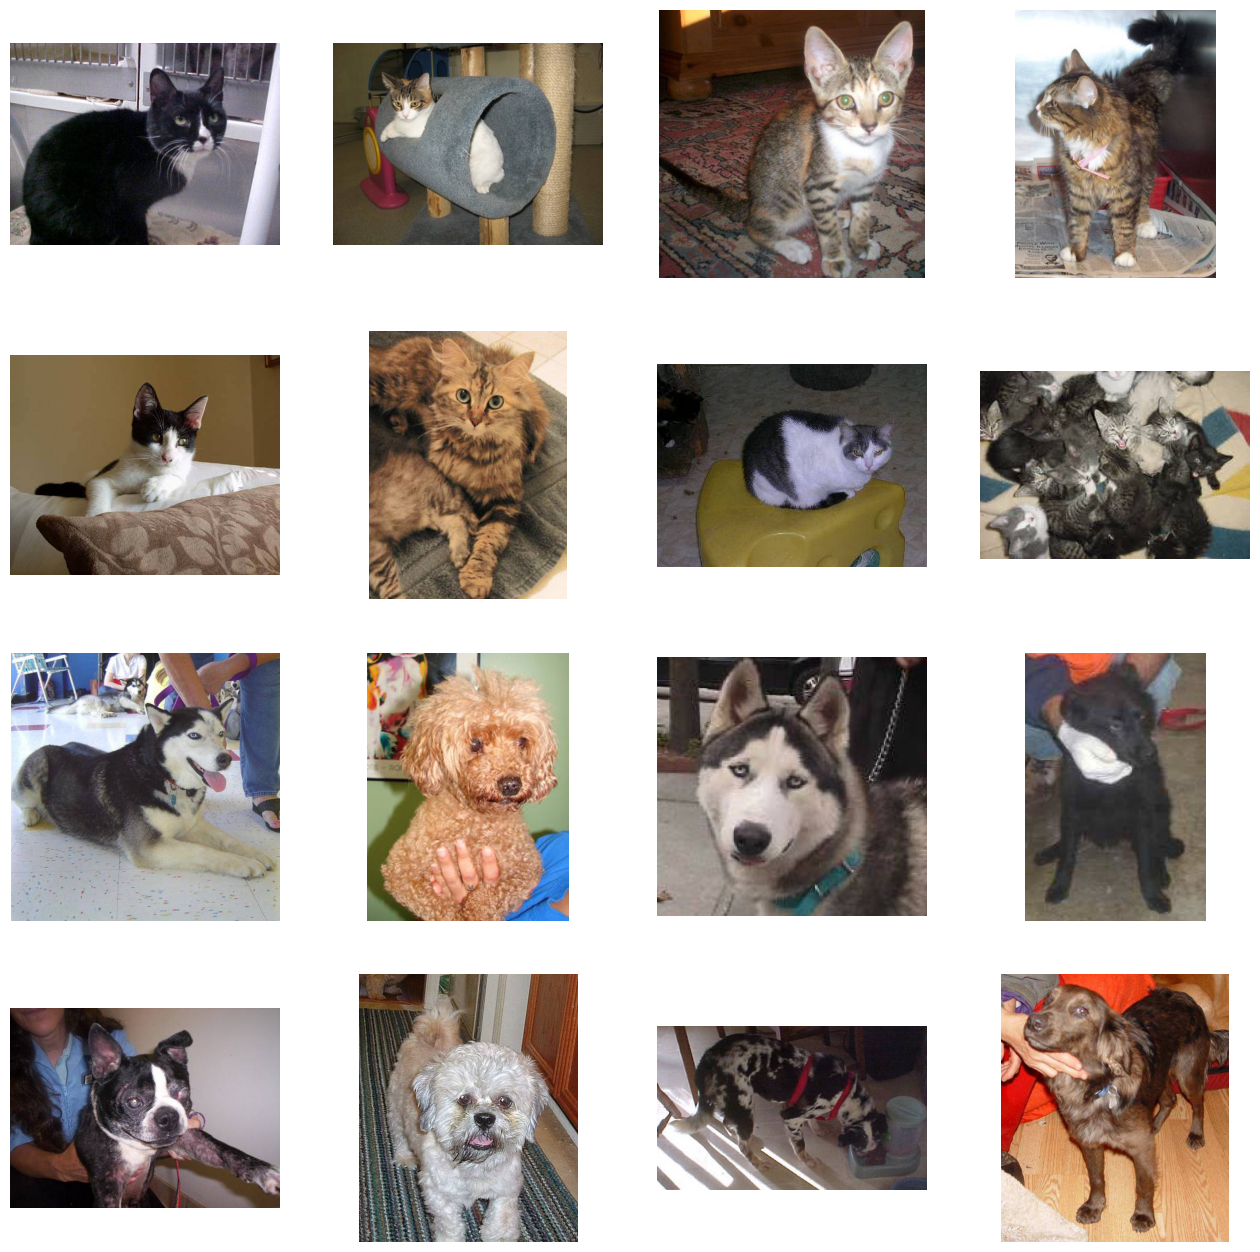

In [72]:
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4
pic_index = 0 # Index for iterating over images
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index+=8
next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[ pic_index-8:pic_index]
]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
for fname in train_dog_fnames[ pic_index-8:pic_index]
]
for i, img_path in enumerate(next_cat_pix+next_dog_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


# 3. Khởi tạo mô hình CNN

Chúng ta sẽ sử dụng một mô hình CNN từ thư viện TensorFlow, với kiến trúc như sau:

* 03 tầng tích chập (convolution layers) kết hợp với Pooling (MaxPooling layers), kích thước mặt nạ tích
chập là 3x3, kích thước pooling là 2x2.
* Sau mỗi tầng tích chập, hàm kích hoạt được sử dụng là ReLU.
* Tiếp theo là một tầng Full Connection và tầng tiếp theo là Flatten (duỗi các kết quả đầu ra thành vector).
* Cuối cùng là một tầng phân loại ở đầu ra, sử dụng hàm Sigmoid (logistic – vì đây chỉ có 02 lớp)

Khởi tạo một CNN như trên:

In [73]:
import tensorflow as tf
#import tensorflow as keras

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # keras.laters.Dropout(rate=0.1),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron.
    # It will contain a value from 0-1 where 0 for 1 class ('cats')
    # and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [74]:
# Ta có thể xem lại kiến trúc mô hình qua lệnh sau:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 64)      

# 4. Huấn luyện mô hình

In [75]:
from tensorflow.keras.optimizers import RMSprop
model.compile(optimizer=RMSprop(learning_rate=0.001),
loss='binary_crossentropy',
metrics = ['accuracy'])

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
batch_size=20,
class_mode='binary',
target_size=(150, 150))

# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size=20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Gọi lệnh huấn luyện mô hình


In [76]:
history = model.fit(
train_generator,
steps_per_epoch=75,
epochs=10,
validation_data=validation_generator,
validation_steps=50,
verbose=2
)

Epoch 1/10
75/75 - 9s - loss: 0.7138 - accuracy: 0.5187 - val_loss: 0.6736 - val_accuracy: 0.5300 - 9s/epoch - 124ms/step
Epoch 2/10
75/75 - 9s - loss: 0.6558 - accuracy: 0.6293 - val_loss: 0.6132 - val_accuracy: 0.6820 - 9s/epoch - 121ms/step
Epoch 3/10
75/75 - 7s - loss: 0.5840 - accuracy: 0.7053 - val_loss: 0.5760 - val_accuracy: 0.7170 - 7s/epoch - 87ms/step
Epoch 4/10
75/75 - 7s - loss: 0.5361 - accuracy: 0.7460 - val_loss: 0.5546 - val_accuracy: 0.7250 - 7s/epoch - 99ms/step
Epoch 5/10
75/75 - 7s - loss: 0.4876 - accuracy: 0.7620 - val_loss: 0.6568 - val_accuracy: 0.6540 - 7s/epoch - 99ms/step
Epoch 6/10
75/75 - 7s - loss: 0.4389 - accuracy: 0.7973 - val_loss: 0.5709 - val_accuracy: 0.6920 - 7s/epoch - 92ms/step
Epoch 7/10
75/75 - 7s - loss: 0.4100 - accuracy: 0.8207 - val_loss: 0.6184 - val_accuracy: 0.6950 - 7s/epoch - 94ms/step
Epoch 8/10
75/75 - 7s - loss: 0.3774 - accuracy: 0.8253 - val_loss: 0.5521 - val_accuracy: 0.7300 - 7s/epoch - 88ms/step
Epoch 9/10
75/75 - 8s - loss: 

## Xem xét một số kết quả

1/1 [==============================] - 0s 75ms/step


<ipython-input-77-5fab0f797c5e>:40: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std ()


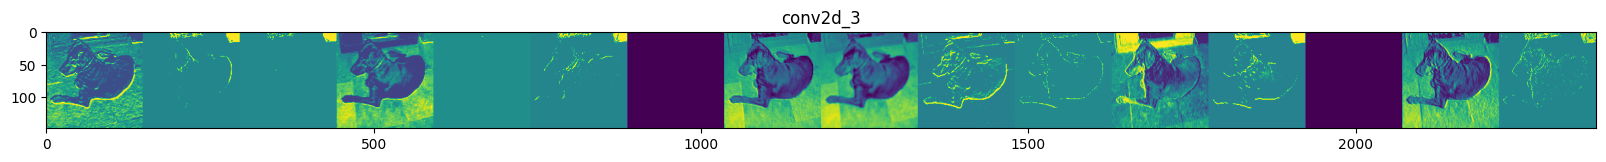

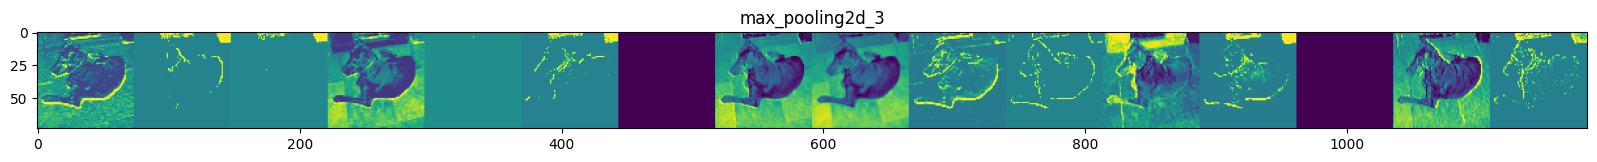

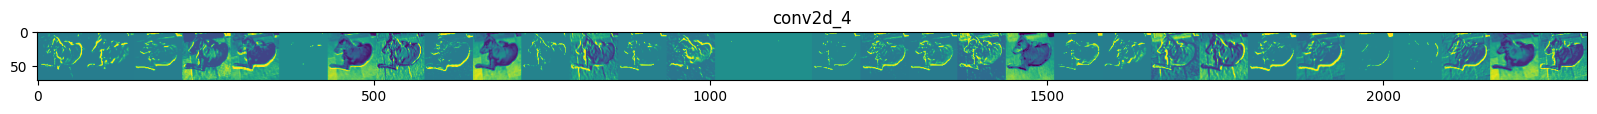

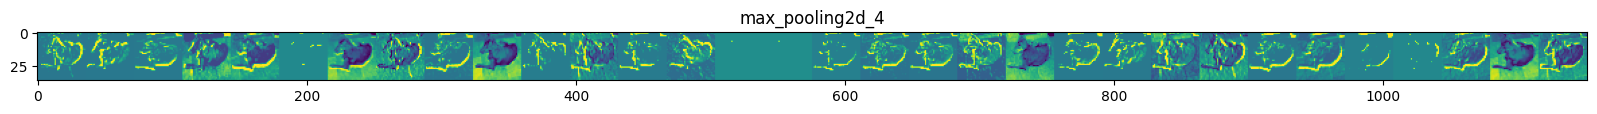

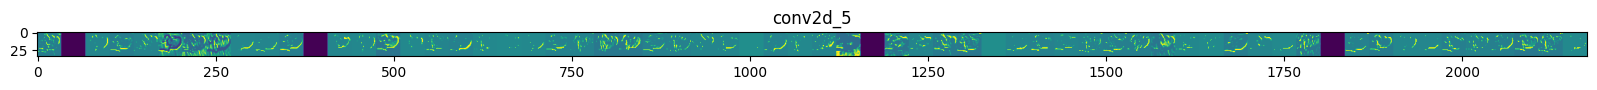

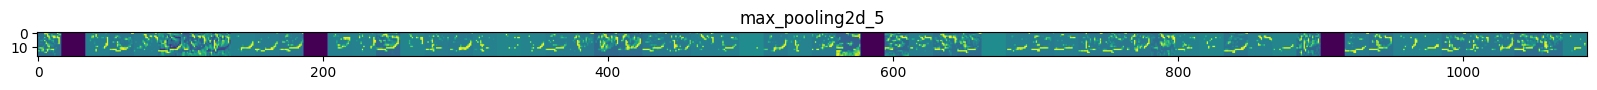

In [77]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model
successive_outputs = [layer.output for layer in model.layers]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs =
successive_outputs)
# Prepare a random input image from the training set.
cat_img_files = [os.path.join(train_cats_dir, f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir, f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150, 150)) # this is a PIL image
x = img_to_array(img) # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 150, 150, 3)
# Scale by 1/255
x /= 255.0
# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
# These are the names of the layers, so we can have them as part of our plot

layer_names = [layer.name for layer in model.layers]
# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
    if len(feature_map.shape) == 4:
        #-------------------------------------------
        # Just do this for the conv / maxpool layers, not the fully-connected layers
        #-------------------------------------------
        n_features = feature_map.shape[-1] # number of features in the feature map
        size = feature_map.shape[ 1] # feature map shape (1, size, size, n_features)
        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        #-------------------------------------------------
        # Postprocess the feature to be visually palatable
        #-------------------------------------------------
        for i in range(n_features):
            x = feature_map[0, :, :, i]
            x -= x.mean()
            x /= x.std ()
            x *= 64
            x += 128
            x = np.clip(x, 0, 255).astype('uint8')
            display_grid[:, i * size : (i + 1) * size] = x # Tile each filter into a horizontal grid

        #-----------------
        # Display the grid
        #-----------------
        scale = 20. / n_features
        plt.figure( figsize=(scale * n_features, scale) )
        plt.title ( layer_name )
        plt.grid ( False )
        plt.imshow( display_grid, aspect='auto', cmap='viridis' )

In [78]:
import numpy as np

#from google.colab import files
import keras.utils as image

#uploaded=files.upload()
#for fn in uploaded.keys():
fn = 'cat.2000.jpg' # change it to your image file
# predicting images
path='cats_and_dogs_filtered/validation/cats/cat.2000.jpg' # change it to your image
img = image.load_img(path, target_size=(150, 150))
x=image.img_to_array(img)
x /= 255
x=np.expand_dims(x, axis=0)
images = np.vstack([x])

In [79]:
classes = model.predict(images, batch_size=10)
print(classes[0])
if classes[0]>0.5:
  print(fn + " is a dog" )
else:
  print(fn + " is a cat" )

1/1 [==============================] - 0s 76ms/step
[0.02874511]
cat.2000.jpg is a cat


Text(0.5, 1.0, 'Training and validation loss')

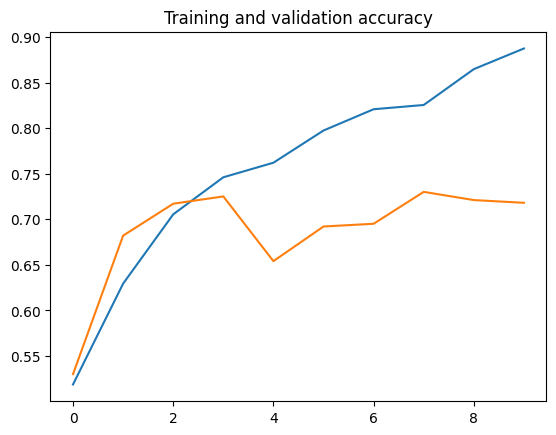

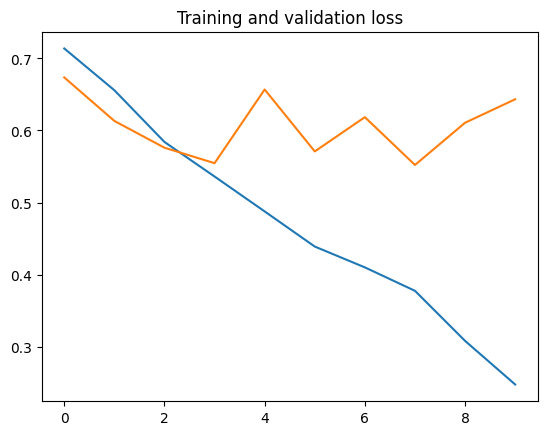

In [80]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history[ 'accuracy' ]
val_acc = history.history[ 'val_accuracy' ]
loss = history.history[ 'loss' ]
val_loss = history.history['val_loss' ]
epochs = range(len(acc)) # Get number of epochs
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot ( epochs, acc )
plt.plot ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot ( epochs, loss )
plt.plot ( epochs, val_loss )
plt.title ('Training and validation loss' )

# Bài tập tự thực hành 1

- Hãy đưa kích thước các ảnh (resize) về 150x150:

In [81]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from keras.preprocessing import image

# Tạo generator dữ liệu từ thư mục
train_datagen = image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=1000,
                                                    class_mode='binary')


validation_generator = train_datagen.flow_from_directory(
                                                    validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=500,
                                                    class_mode='binary')
# Lấy ra một batch dữ liệu
train_x_batch, train_y_batch = train_generator.next()
validation_x_batch, validation_y_batch = validation_generator.next()

# Lấy ra toàn bộ dữ liệu và duỗi thành các vector
train_x_vectors = []
train_y_labels = []
validation_x_vectors = []
validation_y_labels = []

for j in range(train_x_batch.shape[0]):
    x = train_x_batch[j]
    x_vector = x.reshape((x.shape[0] * x.shape[1] * x.shape[2],))
    train_x_vectors.append(x_vector)
    train_y_labels.append(train_y_batch[j])
train_x_vectors = np.array(train_x_vectors)
train_y_labels = np.array(train_y_labels)

for j in range(validation_x_batch.shape[0]):
    x = validation_x_batch[j]
    x_vector = x.reshape((x.shape[0] * x.shape[1] * x.shape[2],))
    validation_x_vectors.append(x_vector)
    validation_y_labels.append(validation_y_batch[j])
validation_x_vectors = np.array(validation_x_vectors)
validation_y_labels = np.array(validation_y_labels)

print(train_x_vectors.shape)
print(train_y_labels.shape)

# Huấn luyện mô hình logistic
Logismodel = LogisticRegression(solver='sag',max_iter = 1000)
Logismodel.fit(train_x_vectors, train_y_labels)
y_pred = Logismodel.predict(validation_x_vectors)

from sklearn.metrics import accuracy_score

print('Accuracy : ',accuracy_score(validation_y_batch, y_pred))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(1000, 67500)
(1000,)
Accuracy :  0.562


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


* Dùng PCA giảm số chiều về còn 225. Sau đó sử dụng mô hình ANN đã có để phân loại. So sánh độ chính xác
so với các phương pháp: Logistic, ANN và CNN.

In [82]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# giảm chiều dữ liệu train
train_x_batch_flattened = train_x_batch.reshape(train_x_batch.shape[0], -1)
pca = PCA(n_components = 225)
train_x_batch_pca = pca.fit_transform(train_x_batch_flattened)

# giảm chiều dữ liệu validation
validation_x_batch_flattened = validation_x_batch.reshape(validation_x_batch.shape[0], -1)
pca = PCA(n_components = 225)
validation_x_batch_pca = pca.fit_transform(validation_x_batch_flattened)

print('train_x_batch_pca.shape : ',train_x_batch_pca.shape)

# áp dụng phương pháp phân loại nhiều lớp: ANN
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=100)
mlp.fit(train_x_batch_pca, train_y_labels)
y_pred = mlp.predict(validation_x_batch_pca)
print(y_pred)

print('Accuracy : ',accuracy_score(validation_y_batch, y_pred))


train_x_batch_pca.shape :  (1000, 225)
[0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1.
 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 1. 1.

- Sưu tầm một số ảnh về 02 loài động vật trên, đặt trong cùng thư mục ( >= 10 ảnh) .
- Chạy predict cho toàn bộ các ảnh sưu tập và đánh giá độ chính xác.

In [83]:
import keras.utils as image

#uploaded=files.upload()
#for fn in uploaded.keys():

# predicting images
for i in range(10):
  fn = str(i)+'.jpg' # change it to your image file
  path='test_image/'+str(i)+'.jpg'  # change it to your image
  img = image.load_img(path, target_size=(150, 150))
  x=image.img_to_array(img)
  x /= 255
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog" )
  else:
    print(fn + " is a cat" )

1/1 [==============================] - 0s 30ms/step
[0.88173705]
0.jpg is a dog
1/1 [==============================] - 0s 17ms/step
[0.99993765]
1.jpg is a dog
1/1 [==============================] - 0s 22ms/step
[0.6599894]
2.jpg is a dog
1/1 [==============================] - 0s 19ms/step
[0.9885865]
3.jpg is a dog
1/1 [==============================] - 0s 21ms/step
[0.9948591]
4.jpg is a dog
1/1 [==============================] - 0s 20ms/step
[0.9743077]
5.jpg is a dog
1/1 [==============================] - 0s 17ms/step
[0.2582226]
6.jpg is a cat
1/1 [==============================] - 0s 17ms/step
[0.8277613]
7.jpg is a dog
1/1 [==============================] - 0s 19ms/step
[0.08899447]
8.jpg is a cat
1/1 [==============================] - 0s 20ms/step
[0.9990369]
9.jpg is a dog
